## Exercise2

In [2]:
#importing basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the dataset
df = pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Q1

#### METADATA
- It is a multivariate dataset
- The dataset has 32 attributes and 569 instances
- the dataset is used in classification problem
- Features describe the characteristics of the cell nuclei present in the image of a fine needle aspirate of a breast mass.
- Diagnosis (M = malignant, B = benign)
- Attribute Information
    - id = id number
    - Ten real-valued features are computed for each cell nucleus:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

#### Q2

In [4]:
#before we start our analysis we drop the Unnamed: 32 column as it is of no use to the analysis and because it is full of NaN values
df = df.drop('Unnamed: 32',axis = 1)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Almost all columns apart from diagnosis ar numeric continuous and therefore we visualize the distribution of all variables except id and diagnosis

In [7]:
#removing the ID column as this too doesn't have any affect on building the classification model an is simply an identifier
df.drop('id',axis=1,inplace = True)

In [8]:
#to tabulate the distribution of the data we use the describe function which gives us the distribution of the data
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
Y = df['diagnosis']
X = df.drop(columns=['diagnosis'])

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

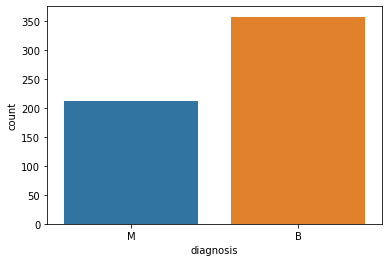

In [10]:
#visualizing the distribution of benign and malignant data in the given dataset
sns.countplot(df['diagnosis'],label = 'count')

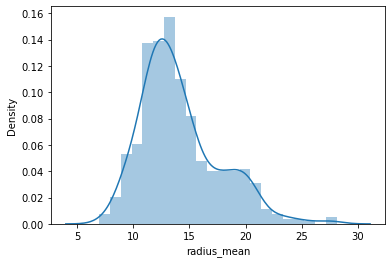

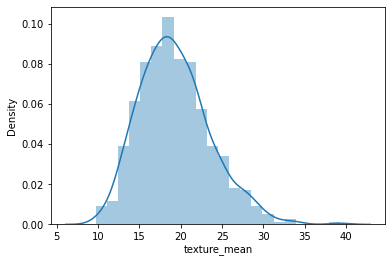

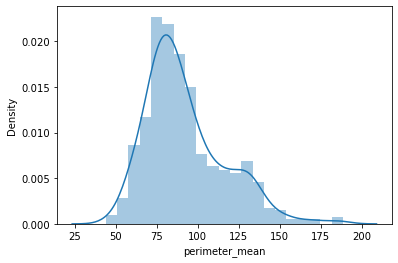

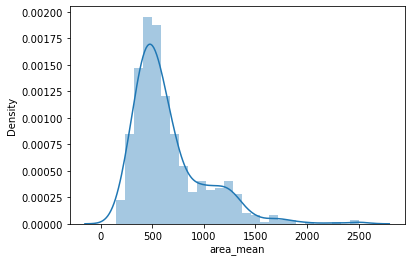

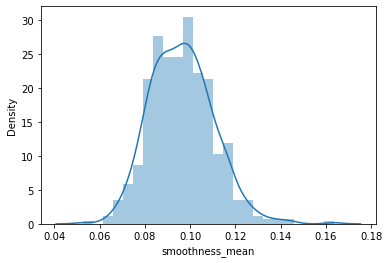

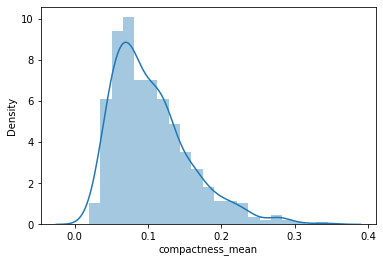

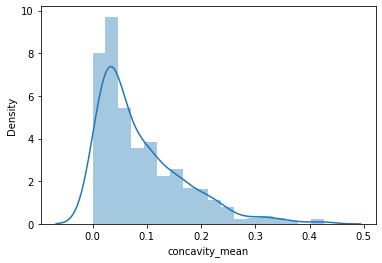

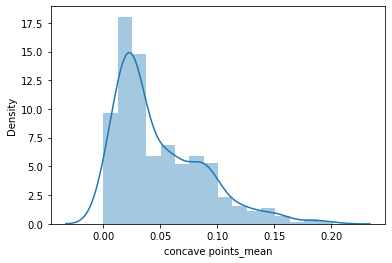

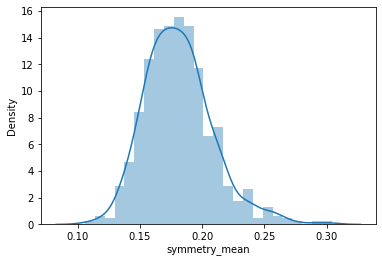

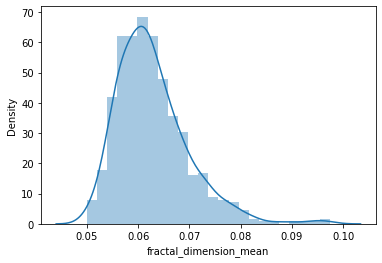

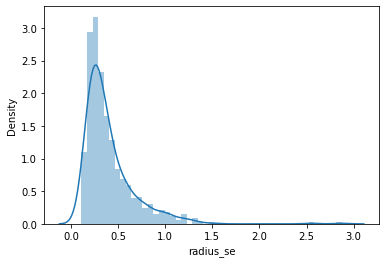

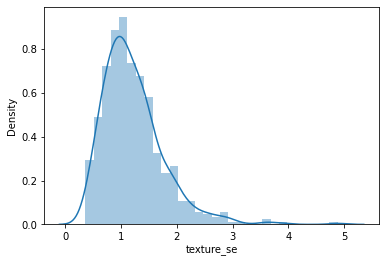

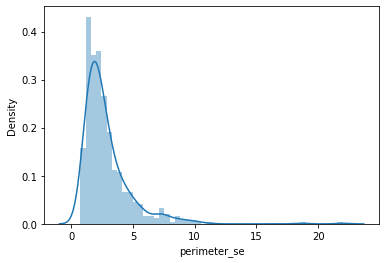

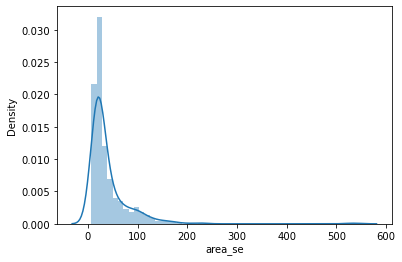

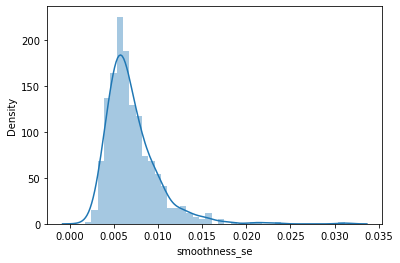

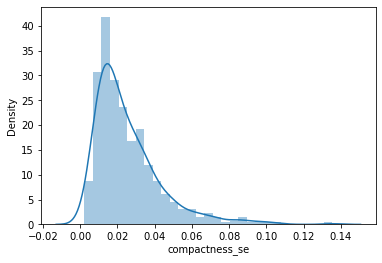

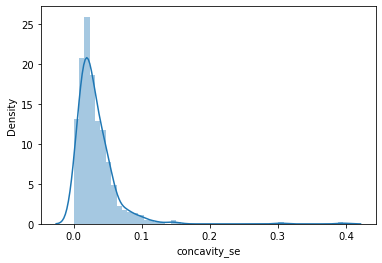

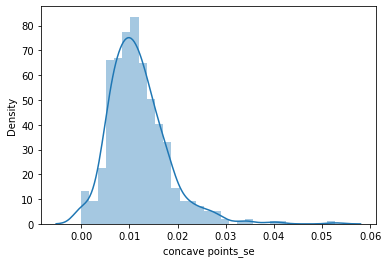

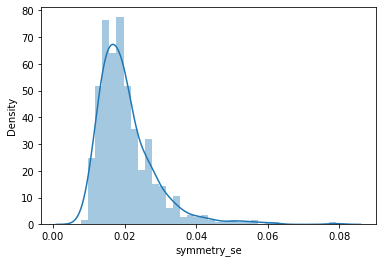

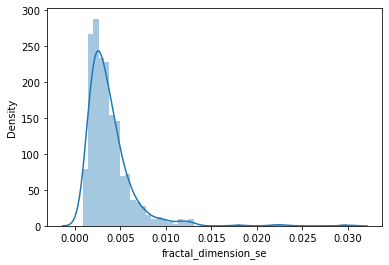

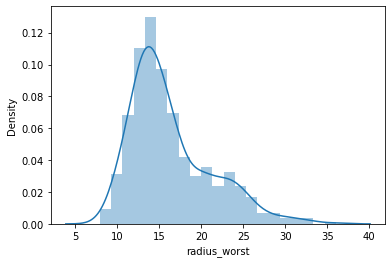

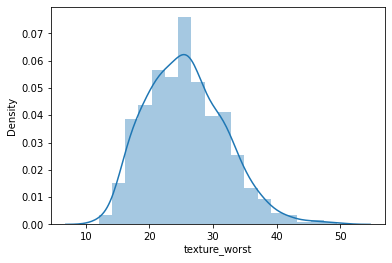

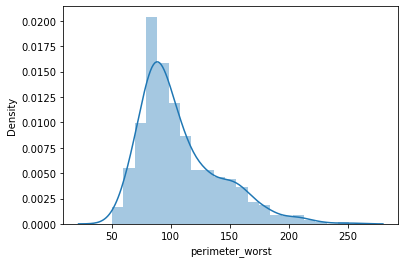

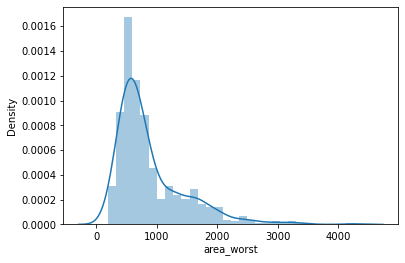

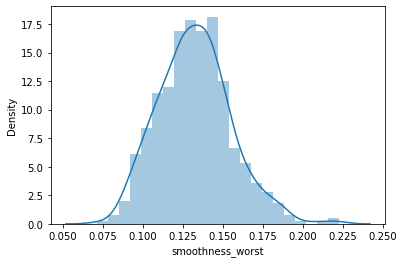

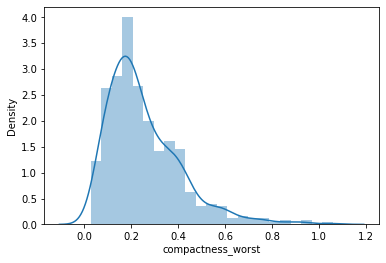

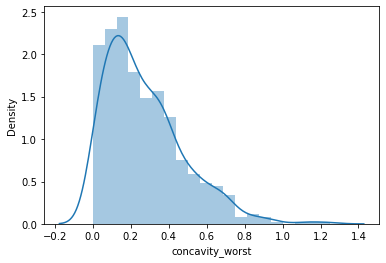

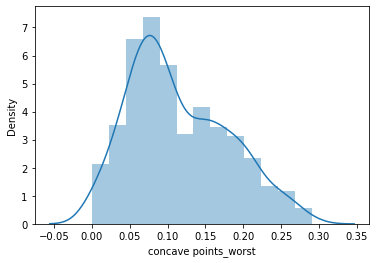

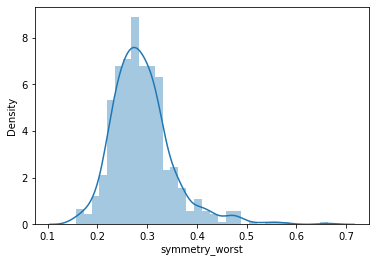

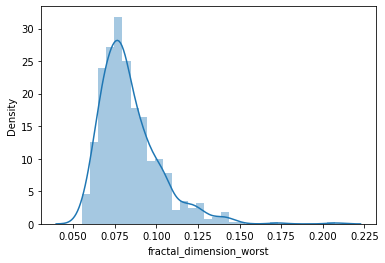

In [11]:
#visualizing the distribution of all the numeric data in the form of a distplot
for i in X:
    plt.figure()
    sns.distplot(df[i])

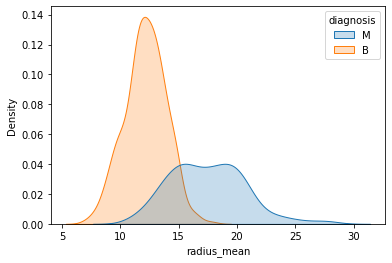

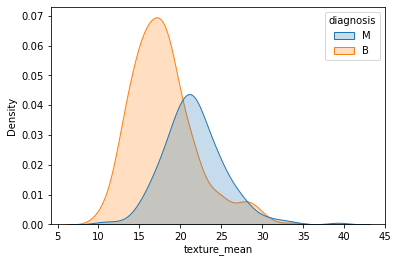

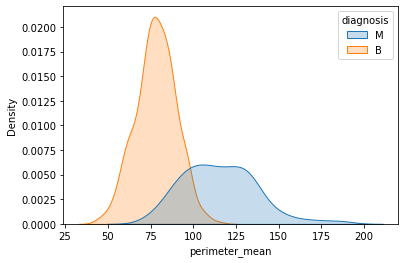

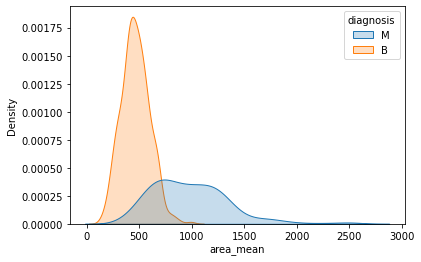

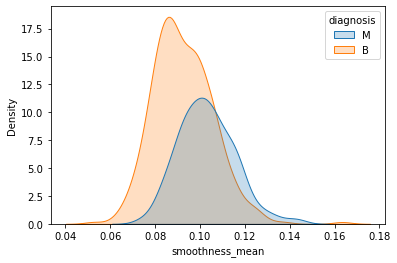

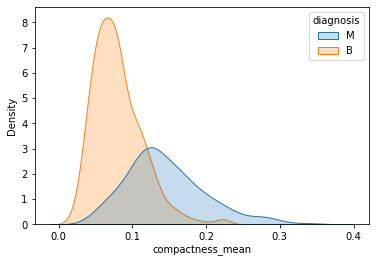

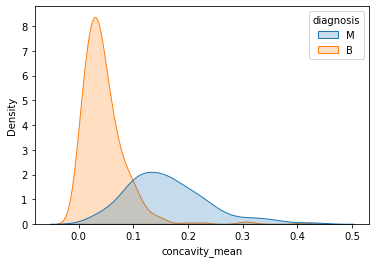

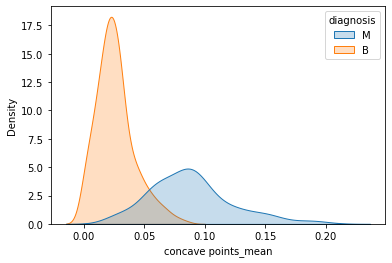

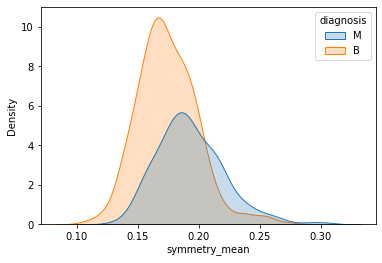

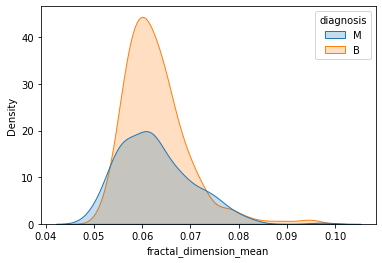

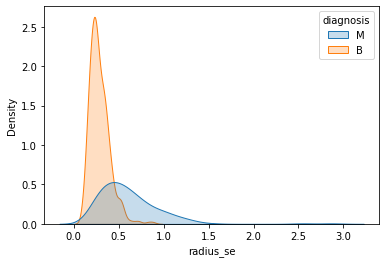

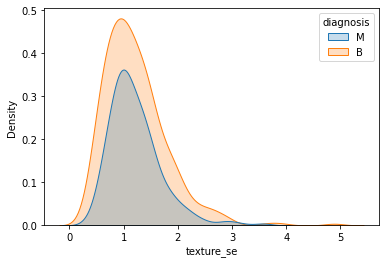

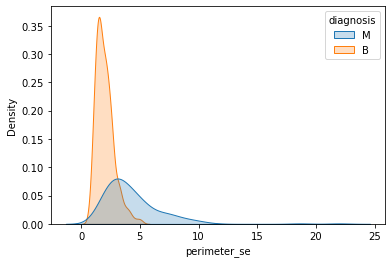

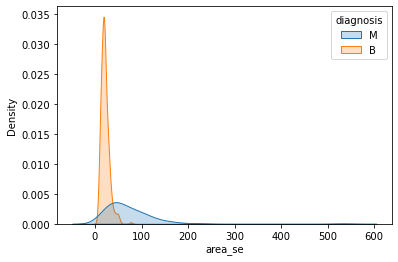

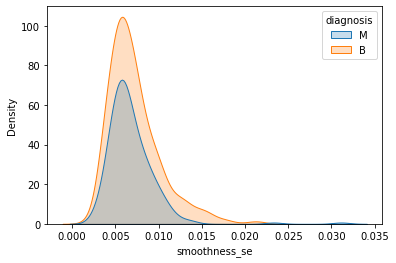

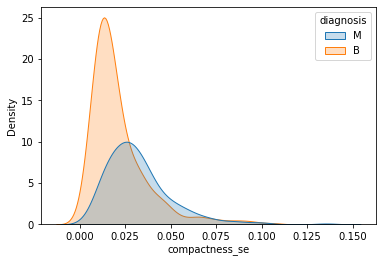

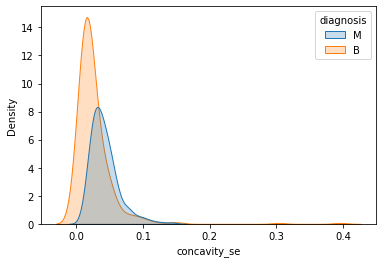

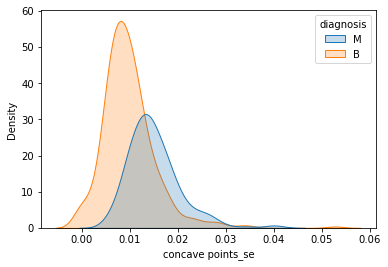

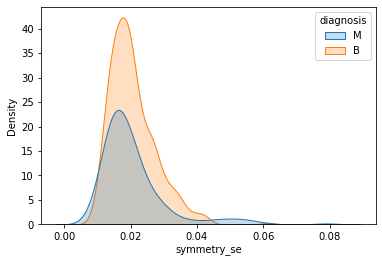

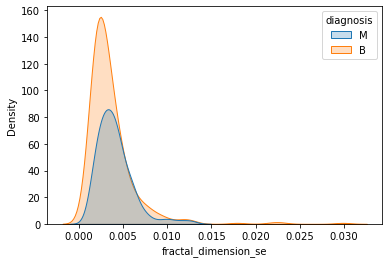

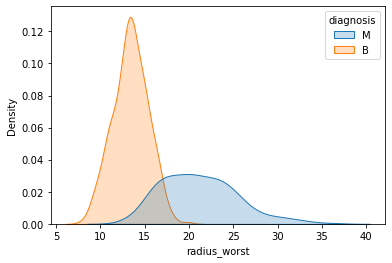

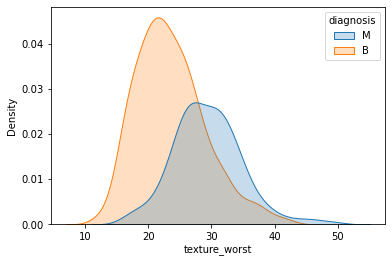

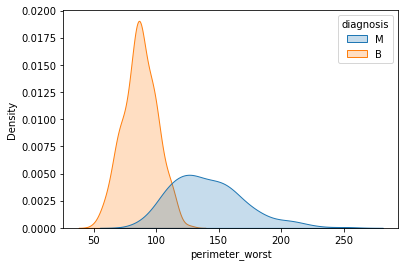

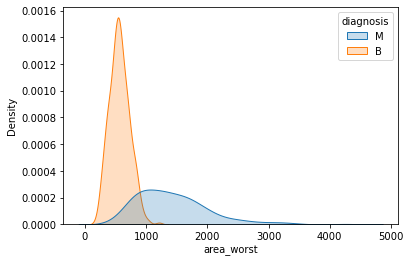

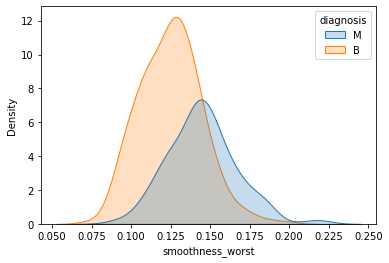

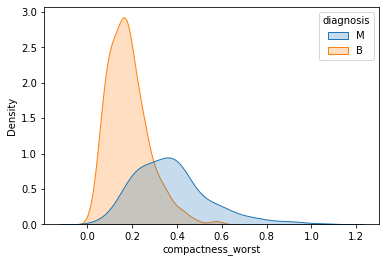

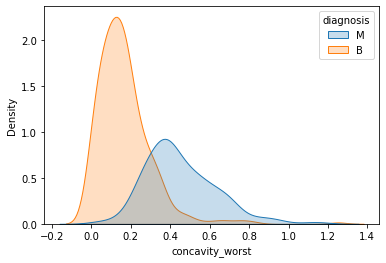

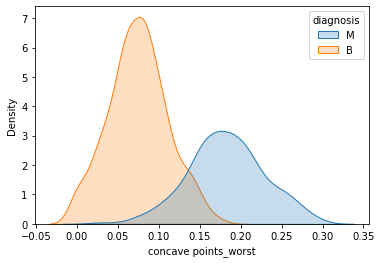

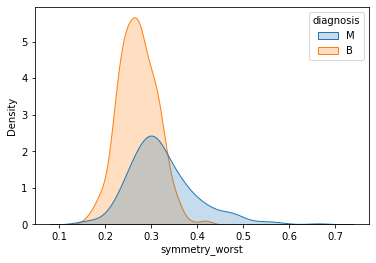

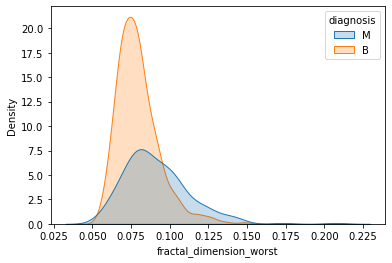

In [13]:
#distribution of data based on class values using kdeplot
for i in df.columns:
    if i == 'diagnosis' or i == 'id':
        continue
    plt.figure()
    sns.kdeplot(data = df,x = i,shade = True, hue = 'diagnosis')

#### Q3

we do exploratory analysis to analyze if we requre to do any preprocessing

In [11]:
#we check if there are any null values in the dataset
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

hence the given data doesnt have any missing values

Replacing the malignant : M with 1 and the bening B : with 0

In [12]:
Y.replace(('M', 'B'), (1, 0), inplace=True)

Now we are finding if there is a correlation that exists between variables. For this we plot a heatmap

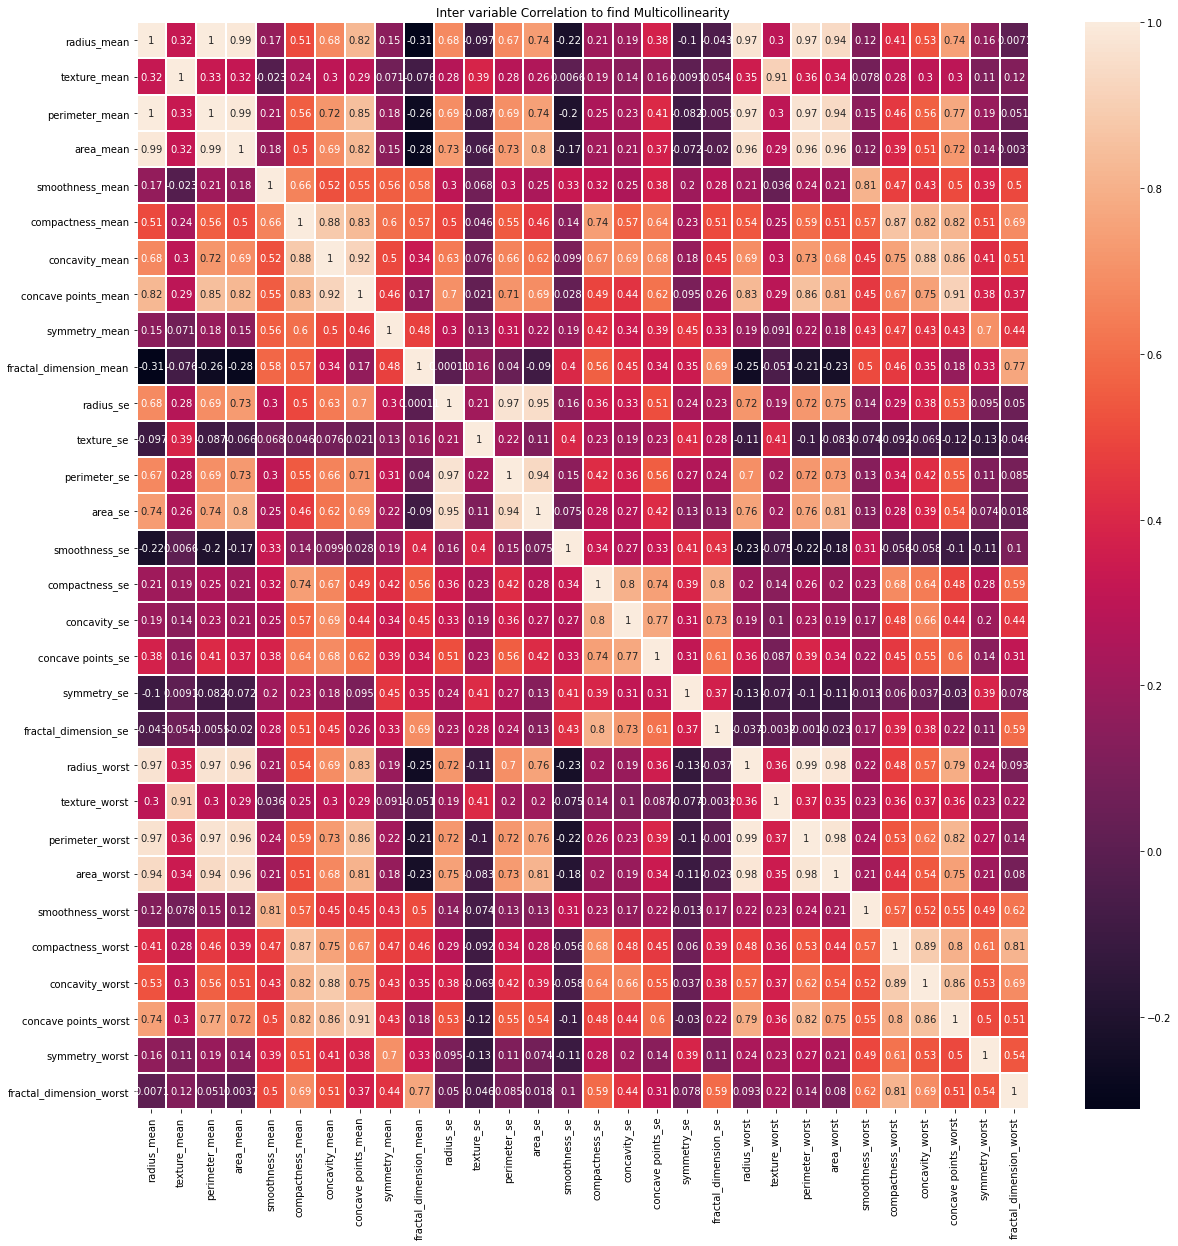

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),linewidth = 1,annot = True)
plt.title("Inter variable Correlation to find Multicollinearity")
plt.show()

this shows that there might be high level of correlation that might exist among variable and therefore there might be the presence of multicollinearity.Inorder to confirm the presence of multicollinearity we calculate the vif 

In [14]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
vif = pd.DataFrame()
vif['variable'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif)

                   variable           VIF
0               radius_mean  63306.172036
1              texture_mean    251.047108
2            perimeter_mean  58123.586079
3                 area_mean   1287.262339
4           smoothness_mean    393.398166
5          compactness_mean    200.980354
6            concavity_mean    157.855046
7       concave points_mean    154.241268
8             symmetry_mean    184.426558
9    fractal_dimension_mean    629.679874
10                radius_se    236.665738
11               texture_se     24.675367
12             perimeter_se    211.396334
13                  area_se     72.466468
14            smoothness_se     26.170243
15           compactness_se     44.919651
16             concavity_se     33.244099
17        concave points_se     53.698656
18              symmetry_se     37.176452
19     fractal_dimension_se     27.532631
20             radius_worst   9674.742602
21            texture_worst    343.004387
22          perimeter_worst   4487

This confirms that the data has a problem of high multicollinearity

Since removing multicollinearity doesn't really significantly improve the predictive power of the model we can leave the data untouched and directly preceed to build the classification models

In [16]:
#splitting the data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [17]:
#perfprming feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#importing the svm classifier
from sklearn import svm

In [19]:
#creating and training the model
svm_model = svm.SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

predicting and evaluating the model

In [21]:
pred = svm_model.predict(X_test)

In [22]:
#creating a confusion matrix 
confusion_matrix = confusion_matrix(Y_test, pred)
confusion_matrix

array([[106,   2],
       [  2,  61]], dtype=int64)

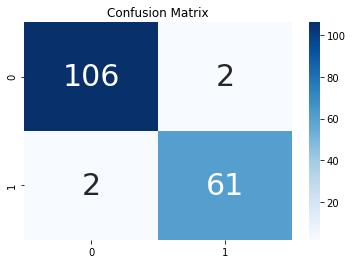

In [23]:
#displaying in the form of heatmap
ax = plt.axes()
df_cm = confusion_matrix
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [24]:
#printing the classification report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



#### Q4

using gridsearch to look for the most optimal hyperparameters 

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param = dict(C= [0.1,1,10,100], gamma=[1,0.1,0.01,0.001,0.0001],kernel = ['rbf','linear','polynomial'])
grid = GridSearchCV(svm.SVC(), param, refit = True, verbose = 3)

In [27]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ..............C=0.1, gamma=1, kernel=polynomial; total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=1, kern

[CV 2/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 2/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 3/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5] END ............C=1, gamma=0.001, kernel=polynomial; total time=   0.0s
[CV 2/5] END ............C=1, gamma=0.001, kernel=polynomial; total time=   0.0s
[CV 3/5] END ............C=1, gamma=0.001, kernel=polynomial; total time=   0.0s
[CV 4/5] END ............C=1

[CV 3/5] END ..................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ..............C=100, gamma=1, kernel=polynomial; total time=   0.0s
[CV 2/5] END ..............C=100, gamma=1, kernel=polynomial; total time=   0.0s
[CV 3/5] END ..............C=100, gamma=1, kernel=polynomial; total time=   0.0s
[CV 4/5] END ..............C=100, gamma=1, kernel=polynomial; total time=   0.0s
[CV 5/5] END ..............C=100, gamma=1, kernel=polynomial; total time=   0.0s
[CV 1/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'polynomial']},
             verbose=3)

In [28]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [29]:
grid.best_score_

0.9748417721518987

In [30]:
grid_pred = grid.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(Y_test,grid_pred)
print(cm)

[[107   1]
 [  2  61]]


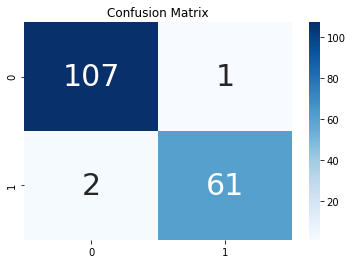

In [32]:
#displaying in the form of heatmap
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [33]:
#printing the classification report
print(classification_report(Y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#### Analysis 
The best model has a high accuracy, recall and f1 score as shown above